In [1]:
from blackjack import BlackjackEnv
import random
import numpy as np

In [2]:
class BlackjackAgent:
    
    def __init__(self):
        pass
    
    def policy(self, state):
        agent_sum, _, _ = state
        if agent_sum >= 20:
            return 0
        else:
            return 1

In [3]:
env = BlackjackEnv()
agent = BlackjackAgent()

values = {}
counts = {}    

In [8]:
for i in range(50000):
    
    trajectory = []
    rewards = []
    
    state = env.reset()
    trajectory.append(state)
    
    done = False
    num_steps = 0
    
    while not done:
        action = agent.policy(state)
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        trajectory.append(state)
        num_steps += 1
    
    rewards = np.array(rewards)
    rewards = rewards * np.logspace(0, num_steps - 1, num_steps, base=0.99)
    cumulative_rewards = np.cumsum(rewards[::-1])[::-1]
    
    visited = set()
    for j, cumulative_reward in enumerate(cumulative_rewards):
       
        if not trajectory[j] in visited:
            visited.add(trajectory[j])
            values[trajectory[j]] = values.get(trajectory[j], 0) + cumulative_reward
            counts[trajectory[j]] = counts.get(trajectory[j], 0) + 1

for key in values.keys():
    values[key] /= (counts[key])

***Value iteration***

In [73]:
class ControlAgent:
    def __init__(self, eps=1e-2, debug=False):
        
        self.Q = {}
        self.counts = {}
        self.eps = eps
        self.logs = {}
        self.debug = debug

        for i in range(32):
            for j in range(11):
                for k in range(2):
                    self.Q[(i, j, k)] = np.random.randn(2)
                    self.counts[(i, j, k)] = [1, 1]
                    self.logs[(i, j, k)] = [[self.Q[(i, j, k)][0]], [self.Q[(i, j, k)][0]]]
    
    def policy(self, state, train=False):
        
        if train:
            if np.random.rand() < self.eps:
                return np.random.randint(2)
            else:
                return self.Q[state].argmax()
        
        else:
            self.Q[state].argmax()
            
    
    def update(self, trajectory, actions, rewards):
        
        assert(len(trajectory) == len(actions) + 1 and len(actions) == len(rewards))
        
        num_steps = len(actions)
        rewards = np.array(rewards)
        rewards = rewards * np.logspace(0, num_steps - 1, num_steps, base=0.99)
        cumulative_rewards = np.cumsum(rewards[::-1])[::-1]
        
        visited = set()
    
        for j, action in enumerate(actions):
            
            state = trajectory[j]
            G = cumulative_rewards[j]
            
            if not state in visited:
                visited.add(state)
                n = self.counts[state][action]
                self.Q[state][action] = self.Q[state][action] * (n / (n + 1)) + G * (1 / (n + 1))
                
                if self.debug:
                    self.logs[state][action].append(self.Q[state][action])
                    
                self.counts[state][action] += 1

In [78]:
agent = ControlAgent(eps=1e-2)
wins = []

for i in range(500000):
    state = env.reset()
    trajectory, actions, rewards = [state], [], []
    
    done = False
    
    while not done:
        action = agent.policy(state, train=True)
        state, reward, done, _ = env.step(action)
        
        actions.append(action)
        rewards.append(reward)
        trajectory.append(state)
        
    agent.update(trajectory, actions, rewards)
    
    wins.append(reward == 1.0)

0.39544


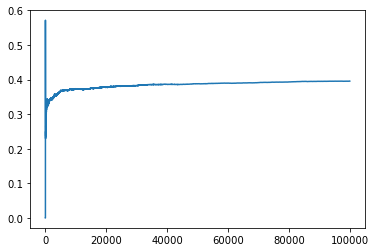

In [79]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(wins) / np.arange(1, len(wins) + 1, 1))
print((np.cumsum(wins) / np.arange(1, len(wins) + 1, 1))[-1])

In [80]:
!qstat -u cs5180404


pbshpc: 
                                                            Req'd  Req'd   Elap
Job ID          Username Queue    Jobname    SessID NDS TSK Memory Time  S Time
--------------- -------- -------- ---------- ------ --- --- ------ ----- - -----
2372357.pbshpc  cs51804* standard triangle_*  21195   1   1    --  05:00 R 03:07
2372386.pbshpc  cs51804* low      triangle_*  22747   1   6    --  05:00 R 02:28
2372479.pbshpc  cs51804* standard STDIN       29367   1   1    --  06:00 R 01:08
